**1.Bussiness Problem**
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

In [231]:
# Loading useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

**2. The Data Set**

In [161]:
# Loading data
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train (1).csv


In [258]:
import io
raw_data = pd.read_csv(io.BytesIO(uploaded['Train.csv']))

In [ ]:
raw_data.head()

In [ ]:
# Checking Data
raw_data.describe(include='all')

In [ ]:
# Checking missing values

raw_data.isna().sum()

In [236]:
# Calculating missing value percentage
print('Item_Weight missing values:' ,raw_data.Item_Weight.isna().sum() / len(raw_data.Item_Weight) * 100, '%')
print('Outlet_Size missing values:' ,raw_data.Outlet_Size.isna().sum() / len(raw_data.Item_Weight) * 100, '%')

Item_Weight missing values: 17.165317376510618 %
Outlet_Size missing values: 28.27642848762173 %


In [259]:
# Filling missing data
 #for Outlet_Size
Outlet_Size_mode = raw_data.Outlet_Size.mode().values[0]
print(Outlet_Size_mode)

raw_data.Outlet_Size = raw_data.Outlet_Size.replace(np.nan,Outlet_Size_mode)

print(raw_data.shape)

Medium
(8523, 12)


In [ ]:
raw_data.head()

In [260]:
# Eliminating missing data
 #for Item_Weight

raw_data.dropna(axis=0,inplace=True)

In [241]:
print(raw_data.shape)

(7060, 12)


In [ ]:
# Checking Data Types
raw_data.info()

In [261]:
# Handling irregular texts
print(raw_data['Item_Fat_Content'].unique())
raw_data['Item_Fat_Content'] = raw_data['Item_Fat_Content'].str.lower()
raw_data['Item_Fat_Content'] = raw_data['Item_Fat_Content'].replace(to_replace='lf',value='low fat')
raw_data['Item_Fat_Content'] = raw_data['Item_Fat_Content'].replace(to_replace='reg',value='regular')
print(raw_data['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['low fat' 'regular']


In [150]:
print(raw_data['Item_Type'].unique())

['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks' 'Frozen Foods' 'Household'
 'Meat' 'Canned' 'Health and Hygiene' 'Starchy Foods' 'Breakfast']


In [151]:
print(raw_data['Outlet_Identifier'].unique())

['OUT049' 'OUT017' 'OUT010' 'OUT046' 'OUT018' 'OUT045' 'OUT013' 'OUT035']


In [152]:
print(raw_data['Outlet_Location_Type'].unique())

['Tier 1' 'Tier 2' 'Tier 3']


In [154]:
print(raw_data['Outlet_Type'].unique())

['Supermarket Type1' 'Grocery Store' 'Supermarket Type2']


In [244]:
raw_data.duplicated().sum()

0

**3. Exploratory Data Analysis (eda) - Outliers**

In [ ]:
# Checking Outliers
col_list = ['Item_Weight','Item_Visibility','Item_MRP']

for i in col_list:
  raw_data.boxplot(column=i)
  plt.show()

25% value:  0.02676848525 75% value:  0.0927738405
IQR value:  0.06600535525
Upper Limit:  0.19178187337499997
Lower Limit:  -0.07223954762499998


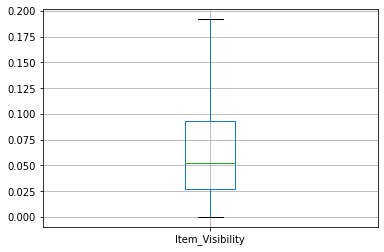

In [262]:
# Item_Visibility has outliers
# Replacing the outlier values using the IQR

Q1,Q3 = raw_data['Item_Visibility'].quantile([0.25,0.75])
print('25% value: ', Q1,'75% value: ', Q3 )
IQR = Q3 - Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('IQR value: ', IQR)
print('Upper Limit: ', upper_limit)
print('Lower Limit: ', lower_limit)
raw_data['Item_Visibility']=np.where(raw_data['Item_Visibility']>upper_limit,upper_limit,raw_data['Item_Visibility'])
raw_data['Item_Visibility']=np.where(raw_data['Item_Visibility']<lower_limit,lower_limit,raw_data['Item_Visibility'])
# checking outliers again
raw_data.boxplot(column='Item_Visibility')
plt.show()

In [263]:
# Correlation
raw_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.013449,0.027141,-0.011588,0.014123
Item_Visibility,-0.013449,1.000000,-0.003890,-0.013824,-0.076868
Item_MRP,0.027141,-0.003890,1.000000,-0.001657,0.620961
Outlet_Establishment_Year,-0.011588,-0.013824,-0.001657,1.000000,0.012212
Item_Outlet_Sales,0.014123,-0.076868,0.620961,0.012212,1.000000


**4. Exploratory Data Analysis (eda) - Graphs**

In [ ]:
col_list2 = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
for i in col_list2:
  sns.scatterplot(x=i,y='Item_Outlet_Sales',data=raw_data,ci=None)
  plt.show()

In [250]:
std_scale=StandardScaler()
std_scale

StandardScaler()

In [264]:
# Data Normalization
col_list3 = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
for i in col_list3:
  raw_data[i] = std_scale.fit_transform(raw_data[[i]])
raw_data.head()
print(raw_data.shape)

(7060, 12)


In [265]:
## Removing 'Item_Identifier','Outlet_Identifier' columns from data
raw_data=raw_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
raw_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.766217,low fat,-1.008482,Dairy,1.739672,1999,Medium,Tier 1,Supermarket Type1,1.054244
1,-1.494175,regular,-0.939827,Soft Drinks,-1.489749,2009,Medium,Tier 3,Supermarket Type2,-1.092522
2,0.999834,low fat,-0.993336,Meat,0.006046,1999,Medium,Tier 1,Supermarket Type1,-0.013928
3,1.365966,regular,-1.349481,Fruits and Vegetables,0.654638,1998,Medium,Tier 3,Grocery Store,-0.904072
4,-0.845905,low fat,-1.349481,Household,-1.400141,1987,High,Tier 3,Supermarket Type1,-0.732990


In [266]:
print(raw_data.shape)

(7060, 10)


**5.Converting Categorical To Numerical**

In [267]:
# Encoding

to_encode = raw_data[['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
dummies = pd.get_dummies(raw_data[['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']],columns= ['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],prefix = ['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],drop_first=True).head()


In [268]:
columns= ['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
raw_data = pd.concat([raw_data,dummies],axis=1)
raw_data.drop(columns,axis=1,inplace=True)


In [ ]:
raw_data.head()

**6.Separating Training And Test Data**

In [270]:
## Separate feature columns and target column

X = raw_data.drop('Item_Outlet_Sales',axis=1)
y= raw_data['Item_Outlet_Sales']



In [271]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split


In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Original shape of dataset: {}".format(raw_data.shape)) # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape)) # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape)) # shape of testing dataset after split

Original shape of dataset: (7060, 33)
Shape of training dataset: (5648, 32)
Shape of testing dataset: (1412, 32)


In [273]:
# Eliminating Nan Values
X_train.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)

**7.Running The Models**

In [274]:
# Decision Tree Model

from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
DT_model = DecisionTreeRegressor(max_leaf_nodes=50,random_state=1)

# Fit model
DT_model.fit(X_train, y_train)

# Predict
DT_predictions = DT_model.predict(X_test)

# Validate
print(mean_absolute_error(y_test, DT_predictions))

0.5740725972807994


In [275]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


# Define model. Specify a number for random_state to ensure same results each run
RF_model =  RandomForestRegressor(random_state=1)

# Fit model
RF_model.fit(X_train, y_train)

# Predict
predictions = RF_model.predict(X_test)

# Validate
print(mean_absolute_error(y_test, predictions))


0.6111997535231215


In [276]:
# Linear Regressor Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define model. Specify a number for random_state to ensure same results each run
LR_model = LinearRegression()

# Fit model
LR_model.fit(X_train, y_train)

# Predict

LR_prediction= LR_model.predict(X_test)

# Validate
mse = mean_squared_error(y_test, LR_prediction)

r2 = r2_score(y_test, LR_prediction)#Best fit lineplt.scatter(x, y)

#Results
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , LR_model.intercept_)
print("Slope :" , LR_model.coef_)


Mean Squared Error :  0.6121605119549487
R-Squared : 0.40795362339121144
Y-intercept : -0.001512791866040293
Slope : [-8.30820335e-03 -7.44312807e-02  6.15316163e-01 -2.48658171e-01
 -1.66533454e-16 -2.77555756e-17  5.55111512e-17  3.76458658e-03
  0.00000000e+00 -3.76745897e-01  0.00000000e+00  0.00000000e+00
  8.31177985e-02  1.81206020e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.28087726e-01  0.00000000e+00  0.00000000e+00
 -3.76745897e-01  2.18851886e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.28087726e-01 -2.26772982e-01  0.00000000e+00
  0.00000000e+00 -1.65540372e-01  1.05002987e-01  1.28087726e-01]


**8.Hyper Parameter Tuning XGB And GBR**

In [277]:
# XG Boost Model
from xgboost import XGBRegressor

XG_model = XGBRegressor(n_estimators=1000)
XG_model.fit(X_train, y_train,early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)],
             verbose=False)
predictions = XG_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

[10:32:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 0.5598730947980095


WORKING ON TEST DATA

In [192]:
# Loading test data
from google.colab import files
uploaded_test = files.upload()

Saving Test.csv to Test (2).csv


In [278]:
import io
test_data = pd.read_csv(io.BytesIO(uploaded_test['Test.csv']))

In [ ]:
print(test_data.head())

In [ ]:
test_data.isna().sum()

In [ ]:
# Filling missing test data 
 #for Outlet_Size
test_Outlet_Size_mode = test_data.Outlet_Size.mode().values[0]
test_data.Outlet_Size = test_data.Outlet_Size.replace(np.nan,test_Outlet_Size_mode)
 #for Item_Weight
test_data.dropna(axis=0,inplace=True)
test_data.isna().sum()

In [282]:
print(test_data.shape)

(4705, 11)


In [283]:
# Irregular text in test data
print(test_data['Item_Fat_Content'].unique())
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].str.lower()
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(to_replace='lf',value='low fat')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(to_replace='reg',value='regular')
print(test_data['Item_Fat_Content'].unique())

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
['low fat' 'regular']


In [ ]:
# Data Normalization in Test Data

test_data['Item_Weight'] = std_scale.fit_transform(test_data[['Item_Weight']])
test_data['Item_Visibility'] = std_scale.fit_transform(test_data[['Item_Visibility']])
test_data['Item_MRP'] = std_scale.fit_transform(test_data[['Item_MRP']])
print(test_data.head())



In [ ]:
## Removing 'Item_Identifier','Outlet_Identifier' columns from test data
test_data=test_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
test_data.head()

In [ ]:
# Encoding test data

to_encode = test_data[['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
test_dummies = pd.get_dummies(test_data[['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']],columns= ['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],prefix = ['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],drop_first=True).head()


In [287]:
columns= ['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
test_data = pd.concat([test_data,test_dummies],axis=1)
test_data.drop(columns,axis=1,inplace=True)

In [288]:
test_data.shape

(4705, 32)

In [289]:
test_data.fillna(0,inplace=True)

**9.Final Predictions On The Test Dataset**

In [290]:
# Test data on Decision Tree Model

# Predict
test_DT_predictions = DT_model.predict(test_data)

# Validate
print(mean_absolute_error(y_test, test_DT_predictions[:1412]))

0.9514555631219699


In [291]:
# Test data on Random Forest Model

# Predict
test_RF_predictions = RF_model.predict(test_data)

# Validate
print(mean_absolute_error(y_test, test_DT_predictions[:1412]))

0.9514555631219699


In [292]:
# Test data on Linear regression Model

# Predict
test_LR_predictions = LR_model.predict(test_data)

# Validate
print(mean_absolute_error(y_test, test_DT_predictions[:1412]))

0.9514555631219699


In [293]:
# Test data on XG Boost Model

# Predict
test_XG_predictions = XG_model.predict(test_data)

# Validate
print(mean_absolute_error(y_test, test_DT_predictions[:1412]))

0.9514555631219699


**10. Saving The Final Model**

In [296]:
final = pd.DataFrame(test_XG_predictions)
final.index = test_data.index 
final.columns = ["prediction"]
final.head()

# To download the csv file locally
from google.colab import files
final.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>